# Linear Regression

## Code implementation

In [1]:

import numpy as np
import matplotlib.pyplot as plt

Define the function $ f_{\pmb{w}, b} $ as a liner function: 
$$
f_{\pmb{w}, b}(x) = \pmb{w} * \pmb{x} + b
$$

In [2]:
def f_x(x, w, b):
    return np.dot(x, w) + b

### Cost function
Define the cost function as a squared error cost function with regularization:
$$
J(\pmb{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{\pmb{w}, b}(\pmb{x}^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}
$$

In [3]:
def cost_fun(X, y, w, b, lambda_=1):
    m, n = X.shape
    cost = 0
    for i in range(m):
        err = f_x(X[i], w, b) - y[i]
        cost += err**2
    cost = cost / (2*m)
    # Regularization
    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]
    reg_cost = (lambda_/(2*m)) * reg_cost 
    # Total cost
    cost = cost + reg_cost
    return cost

### Gradient descent algorithm
repeat each iteration:
$$ \pmb{w} = \pmb{w} - \alpha \frac{\partial}{\partial \pmb{w}}J(\pmb{w}, b) $$
$$ b = b - \alpha \frac{\partial}{\partial b}J(\pmb{w}, b) $$

Cost derivatives:
$$
\frac{\partial}{\partial \pmb{w}}J(\pmb{w}, b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\pmb{w}, b}(\pmb{x}^{(i)}) - y^{(i)}) \pmb{x}^{(i)} +  \frac{\lambda}{m} w_j \tag{2} 
$$
$$
\frac{\partial}{\partial b}J(\pmb{w}, b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\pmb{w}, b}(\pmb{x}^{(i)}) - y^{(i)})
$$

In [4]:
def cost_derivative(X, y, w, b, lambda_):
    m, n = X.shape
    dj_w = np.zeros(n)
    dj_b= 0
    for i in range(m):
        err = f_x(X[i], w, b) - y[i]
        dj_w += err * X[i]
        dj_b += err
    dj_w = dj_w / m
    dj_b = dj_b / m
    # Regularization
    dj_w = dj_w + (lambda_/m) * w
    
    return dj_w, dj_b


In [5]:
def iter_print(iter, w, b, cost):
    print(f'Iter: {iter} - w: {w}, b: {b}, cost: {cost}')

def gradient_decent(X, y, w, b, alpha, iterations, lambda_=1):
    history = []
    for i in range(iterations+1): # every iteration
        dj_w, dj_b = cost_derivative(X, y, w, b, lambda_) # Calclate derivatives
        # set new paramiters
        w = w - alpha*dj_w 
        b = b - alpha*dj_b
        if i % 100 == 0: # Every 100 iterations save the paramiters and cost
            cost = cost_fun(X, y, w, b, lambda_)
            iter_print(i, w, b, cost) # Print iteration
            history.append([w, b, cost])
    return w, b, history
    

### Feature Scaling
Perform some transformation on the traning data to have a similar scale

Z-score normalization:
$$ x_i = \frac{x_i - \mu_i}{\sigma_i}

In [6]:
def z_score (x):
    mu = np.mean(x)
    sdt = np.std(x)
    x = (x - mu) / sdt
    return x, mu, sdt
    

## Test algorthm

Data creation and plotting

In [12]:
def get_data(m, c): # Create training data from the function y = X^2
    X_train = np.arange(0,m,1)
    np.random.seed(1)
    y_ideal = X_train**2 + c
    y_train = y_ideal + 0.7 * y_ideal*(np.random.sample((m,))-0.5)
    
    return X_train, y_train


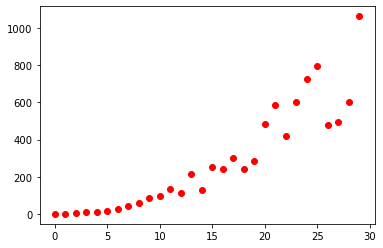

In [13]:
m = 30
c = 0
x_train, y_train = get_data(m, c) # get tranong data
x_train = x_train.reshape(-1, 1)

plt.plot(x_train, y_train, 'ro') # Training data plot
plt.show()

Run gradient descent

In [62]:
X_train = np.c_[x_train, x_train**2, x_train**3] # Engineer feature
# Initialize values
w = np.zeros(X_train[0].shape)
b = 0
alpha = 1e-11
iter = 3000

model_w, model_b, history = gradient_decent(X_train, y_train, w, b, alpha, iter, 1) # Run gradient decent

Iter: 0 - w: [6.29329594e-08 1.48248477e-06 3.63424078e-05], b: 2.8409926395348212e-09, cost: 78504.17244044082
Iter: 100 - w: [6.09083276e-06 1.43210216e-04 3.50580381e-03], b: 2.7568904569958545e-07, cost: 66443.85898645758
Iter: 200 - w: [1.16245707e-05 2.72796462e-04 6.66844966e-03], b: 5.275875824286286e-07, cost: 56422.190939101936
Iter: 300 - w: [1.67078446e-05 3.91314875e-04 9.55141125e-03], b: 7.603891275427175e-07, cost: 48094.56018053661
Iter: 400 - w: [2.13804884e-05 4.99744170e-04 1.21794207e-02], b: 9.757823893783554e-07, cost: 41174.61038821093
Iter: 500 - w: [2.56788134e-05 5.98976511e-04 1.45750231e-02], b: 1.1753067459643936e-06, cost: 35424.39028001542
Iter: 600 - w: [2.96359199e-05 6.89825173e-04 1.67587699e-02], b: 1.360365450109196e-06, cost: 30646.171333132002
Iter: 700 - w: [3.32819813e-05 7.73031511e-04 1.87493953e-02], b: 1.5322376667789315e-06, cost: 26675.648617621962
Iter: 800 - w: [3.66445027e-05 8.49271325e-04 2.05639766e-02], b: 1.69208944602597e-06, cos

Run Gradient descednt with feature scaling

In [71]:
x_train_norm, mu, sdt = z_score(x_train) # Get traninge set normalized

X_train_norm = np.c_[x_train_norm, x_train_norm**2, x_train_norm**3, x_train_norm**4] # Engineer feature
# Initialize values
w = np.zeros(X_train_norm[0].shape)
b = 0
alpha = 1e-1
iter = 100

model_norm_w, model_norm_b, history = gradient_decent(X_train_norm, y_train, w, b, alpha, iter, 1) # Run gradient decent

Iter: 0 - w: [25.11549095 34.00413595 44.54039397 65.50046823], b: 28.409926395348215, cost: 29532.086680824563
Iter: 100 - w: [189.53085028  60.37571732  27.72883593   3.81618757], b: 216.18674055255838, cost: 5252.809233729466


### Results plot

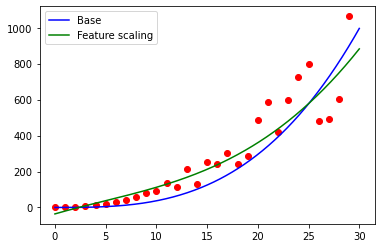

In [70]:

plt.plot(X_train[:,0], y_train, 'ro')

x = np.linspace(0,30,300)
X = np.c_[x, x**2, x**3]

plt.plot(x, X@model_w + model_b, 'b', label='Base')

x = np.linspace(0, 30,300)
x_sup, mu, sdt = z_score(x)
X = np.c_[x_sup, x_sup**2, x_sup**3, x_sup**4]

plt.plot(x, X@model_norm_w + model_norm_b, 'g', label='Feature scaling')

plt.legend()
plt.show()
